# 2. Photometric Redshifts of galaxies (Part II): RandomForest

In [20]:
#     Include all required python-related packages     ##
import pandas as pd #dataframes
import numpy as np #deal with arrays
import matplotlib.pyplot as plt #plotting
import seaborn as sns #Statistical visualization
from astropy.table import Table #Read tables
#to show plots in line
%matplotlib inline 
sns.set(style="white") #Features of seaborn
from matplotlib import rcParams
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['axes.labelsize'] = 15


#For this problem: RandomForest
from sklearn.ensemble import RandomForestRegressor

In [4]:
#Read tables using astropy and transforming them to pandas. Set the directory where the tables are for convenience.
directory="/Users/guadalupecanasherrera/DDM2017_FinalProject/FinalProject/Q2/Tables/"
A=Table.read(directory+"PhotoZFileA.vot").to_pandas()
B=Table.read(directory+"PhotoZFileB.vot").to_pandas()
#A
#I save in panda dataframe structures magnitudes for the colors:
#Table A
A['mag_g']    = A['mag_r'].values + A["g-r"].values
A['mag_u']    = A['mag_g'].values + A["u-g"].values
A['mag_i']    = A['mag_r'].values - A["r-i"].values
A['mag_z']    = A['mag_i'].values - A["i-z"].values
#Table B
B['mag_g']    = B['mag_r'].values + B["g-r"].values
B['mag_u']    = B['mag_g'].values + B["u-g"].values
B['mag_i']    = B['mag_r'].values - B["r-i"].values
B['mag_z']    = B['mag_i'].values - B["i-z"].values
#Save in variables for fitting required by AstroML
X = np.vstack((A['mag_r'].values, A['mag_g'].values, A['mag_u'].values, A['mag_i'].values, A['mag_z'].values,
               A['z_spec'].values)).T
M = np.vstack((A['mag_r'].values, A['mag_g'].values, A['mag_u'].values, A['mag_i'].values, A['mag_z'].values)).T
Zspec=A['z_spec'].values

M_test = np.vstack((B['mag_r'].values, B['mag_g'].values, B['mag_u'].values, B['mag_i'].values, B['mag_z'].values)).T
Zspec_test=B['z_spec'].values

### Random Forest Regression: study of the changes with respect to the number of estimators.

In [35]:
#Set the number of estimators
n_est = 20  
model_randomforest = RandomForestRegressor(n_estimators=n_est)
model_randomforest.fit(M, Zspec)
Result=model_randomforest.predict(M)
print "Training Error: {0}".format(np.median(np.abs((Zspec-Result)/(1 + Zspec))))
Resultb=model_randomforest.predict(M_test)
print "Generalization Error: {0}".format(np.median(np.abs((Zspec_test-Resultb)/(1 + Zspec_test))))


Training Error: 0.00455014873342
Generalization Error: 0.0125621495338


(0, 1)

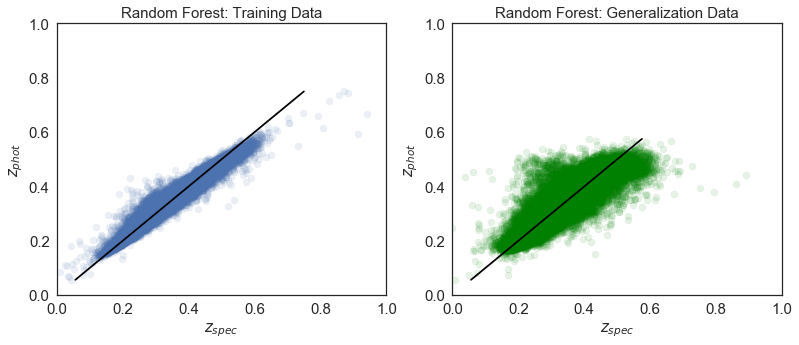

In [36]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(13, 5))
axes[0].scatter(Zspec, Result, alpha=0.1)
axes[0].plot(np.linspace(min(Result), max(Result)), np.linspace(min(Result), max(Result)), 'k')
axes[0].set_xlabel('$z_{spec}$', fontsize=15)
axes[0].set_ylabel(r'$z_{phot}$', fontsize=15)
axes[0].set_title(r'Random Forest: Training Data', fontsize=15)
axes[0].set_xlim(0, 1)   
axes[0].set_ylim(0, 1)       
        
axes[1].scatter(Zspec_test, Resultb, alpha=0.1, c='g')
axes[1].plot(np.linspace(min(Resultb), max(Resultb)), np.linspace(min(Resultb), max(Resultb)), 'k')
axes[1].set_xlabel('$z_{spec}$', fontsize=15)
axes[1].set_ylabel(r'$z_{phot}$', fontsize=15)
axes[1].set_title(r'Random Forest: Generalization Data', fontsize=15)
axes[1].set_xlim(0, 1)   
axes[1].set_ylim(0, 1)       


In [8]:
#preparing variables for the loop to see how E(theta) depends of estimators
number_estimators=np.arange(1, 100, 3)
E_theta=[]
E_theta_g=[]

for element in number_estimators:
    print element
    model_randomforest = RandomForestRegressor(n_estimators=element)
    model_randomforest.fit(M, Zspec) 
    Result=(model_randomforest.predict(M))
    E_theta.append(np.median(np.abs((Zspec-Result)/(1 + Zspec))))
    Resultb=(model_randomforest .predict(M_test))
    E_theta_g.append(np.median(np.abs((Zspec_test-Resultb)/(1 + Zspec_test))))

1
4
7
10
13
16
19
22
25
28
31
34
37
40
43
46
49
52
55
58
61
64
67
70
73
76
79
82
85
88
91
94
97


Minimum value of E(theta)_t = 0.00444501591495 for estimator = 31

Minimum value of E(theta)_g = 0.0121780354156 for estimator = 25



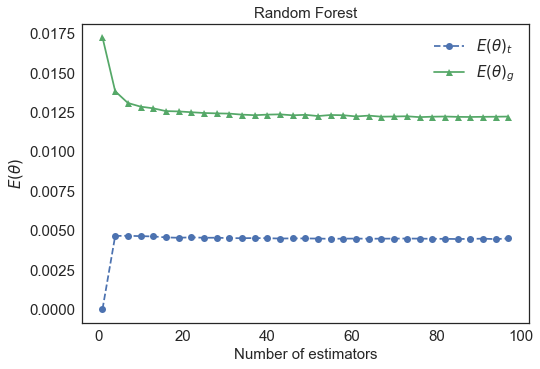

In [33]:
ax = plt.subplot()
ax.plot(number_estimators, E_theta, linestyle='dashed', marker='o', label=r"$E(\theta)_t$")
ax.plot(number_estimators, E_theta_g, linestyle='solid', marker='^', label=r"$E(\theta)_g$")
ax.legend(fontsize=15)
ax.set_xlabel("Number of estimators", fontsize=15)
ax.set_ylabel(r"$E(\theta)$", fontsize=15)
ax.set_title(r"Random Forest", fontsize=15)

print "Minimum value of E(theta)_t = {0} for estimator = {1}\n".format(min(E_theta[1:]), np.argmin(E_theta[1:])+1)
print "Minimum value of E(theta)_g = {0} for estimator = {1}\n".format(min(E_theta_g[1:]), np.argmin(E_theta_g[1:])+1)

#With 10 estimators is more than enough
